In [2]:
# Data Manipulation
import numpy as np
import statistics as st
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = lambda x: f'{x:0.2f}'

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Preprocesing
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# Algorithms
import xgboost as xgb
# import lightgbm as lm
# import catboost as cbt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Model Evaluation
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, recall_score 

import warnings
warnings.filterwarnings('ignore')

#### Load and inspect data

In [3]:
data = pd.read_excel('CreditScoreData.xlsx')
data.shape

(23929, 28)

In [4]:
data.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age_Months,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.99,2,4,6,1,Credit-Builder Loan,7,1,7.42,2,Good,605.03,38.55,320,No,18.82,40.39,High_spent_Large_value_payments,484.59,Good
1,0x1612,CUS_0x21b1,May,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.99,2,4,6,1,Credit-Builder Loan,3,1,6.42,2,Good,605.03,34.98,323,No,18.82,130.12,Low_spent_Small_value_payments,444.87,Good
2,0x1613,CUS_0x21b1,June,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.99,2,4,6,1,Credit-Builder Loan,3,0,5.42,2,Good,605.03,33.38,324,No,18.82,43.48,High_spent_Large_value_payments,481.51,Good
3,0x1615,CUS_0x21b1,August,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.99,2,4,6,1,Credit-Builder Loan,3,4,5.42,2,Good,605.03,32.93,326,No,18.82,218.90,Low_spent_Small_value_payments,356.08,Good
4,0x1626,CUS_0xb891,January,Jasond,54,072-31-6145,Entrepreneur,30689.89,2612.49,2,5,4,1,Not Specified,0,6,1.99,4,Good,632.46,26.54,207,No,16.42,81.23,Low_spent_Large_value_payments,433.60,Standard
5,0x1627,CUS_0xb891,February,Jasond,54,072-31-6145,Entrepreneur,30689.89,2612.49,2,5,4,1,Not Specified,5,3,1.99,4,Good,632.46,35.28,208,No,16.42,124.88,Low_spent_Small_value_payments,409.95,Standard
6,0x1628,CUS_0xb891,March,Jasond,55,072-31-6145,Entrepreneur,30689.89,2612.49,2,5,4,1,Not Specified,3,9,1.99,4,Good,632.46,32.30,209,No,16.42,83.41,High_spent_Medium_value_payments,411.43,Standard
7,0x1638,CUS_0x1cdb,July,Deepaa,21,615-06-7821,Developer,35547.71,2853.31,7,5,5,0,NaN,10,15,2.58,4,Standard,943.86,26.26,374,Yes,0.00,181.01,Low_spent_Small_value_payments,394.32,Standard
8,0x1641,CUS_0x95ee,April,Np,31,612-70-8987,Lawyer,73928.46,5988.70,4,5,8,0,NaN,8,7,10.14,2,Good,548.20,30.20,386,No,0.00,618.20,Low_spent_Small_value_payments,270.67,Good
9,0x1666,CUS_0x4157,May,Charlie Zhur,23,070-19-1622,Doctor,114838.41,9843.87,2,5,7,3,"Personal Loan, Debt Consolidation Loan, and Au...",11,11,11.24,8,Good,1377.74,29.82,260,No,226.89,649.81,High_spent_Small_value_payments,367.68,Standard


In [5]:
data1 = data.copy()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23929 entries, 0 to 23928
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         23929 non-null  object 
 1   Customer_ID                23929 non-null  object 
 2   Month                      23929 non-null  object 
 3   Name                       23929 non-null  object 
 4   Age                        23929 non-null  int64  
 5   SSN                        23929 non-null  object 
 6   Occupation                 23929 non-null  object 
 7   Annual_Income              23929 non-null  float64
 8   Monthly_Inhand_Salary      23929 non-null  float64
 9   Num_Bank_Accounts          23929 non-null  int64  
 10  Num_Credit_Card            23929 non-null  int64  
 11  Interest_Rate              23929 non-null  int64  
 12  Num_of_Loan                23929 non-null  int64  
 13  Type_of_Loan               21403 non-null  obj

In [6]:
data1.drop_duplicates('Name', ignore_index=True, inplace=True)
data1.drop(['ID','Customer_ID','Name', 'SSN'], axis=1, inplace=True)
data1.shape

(8934, 24)

In [7]:
missing = data1.isnull().sum()
count = data1.isnull().count()
percentage = missing/count * 100
percentage.sort_values(ascending=True)

Month                        0.00
Payment_Behaviour            0.00
Amount_invested_monthly      0.00
Total_EMI_per_month          0.00
Payment_of_Min_Amount        0.00
Credit_History_Age_Months    0.00
Credit_Utilization_Ratio     0.00
Outstanding_Debt             0.00
Credit_Mix                   0.00
Num_Credit_Inquiries         0.00
Changed_Credit_Limit         0.00
Num_of_Delayed_Payment       0.00
Delay_from_due_date          0.00
Num_of_Loan                  0.00
Interest_Rate                0.00
Num_Credit_Card              0.00
Num_Bank_Accounts            0.00
Monthly_Inhand_Salary        0.00
Annual_Income                0.00
Occupation                   0.00
Age                          0.00
Monthly_Balance              0.00
Credit_Score                 0.00
Type_of_Loan                10.96
dtype: float64

In [8]:
data1.Type_of_Loan.nunique()

4809

In [9]:
data1 = data1.drop('Type_of_Loan', axis=1)

In [10]:
data1.reset_index(drop=True, inplace=True)

In [11]:
data1.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age_Months,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,8934.00,8934.00,8934.00,8934.00,8934.00,8934.00,8934.00,8934.00,8934.00,8934.00,8934.00,8934.00,8934.00,8934.00,8934.00,8934.00,8934.00
mean,33.02,187100.11,4101.64,5.60,5.59,14.96,3.59,21.56,32.92,10.57,23.46,1453.10,32.33,217.30,1398.56,185.56,396.83
std,10.68,1522608.13,3108.67,2.37,2.05,8.79,2.45,14.80,237.08,6.79,175.40,1166.24,5.05,99.53,8305.32,180.81,207.56
min,14.00,7006.52,303.65,1.00,1.00,1.00,0.00,0.00,0.00,-6.44,0.00,0.54,21.26,2.00,0.00,0.00,3.36
25%,24.00,19286.81,1618.49,4.00,4.00,8.00,2.00,10.00,9.00,5.51,3.00,580.36,28.18,139.25,30.38,69.38,269.63
50%,33.00,36688.03,3047.98,6.00,5.00,14.00,3.00,18.00,14.00,9.58,5.00,1191.75,32.37,216.00,67.97,125.54,333.07
75%,41.00,71497.93,5861.82,7.00,7.00,20.00,5.00,28.00,18.00,15.11,8.00,1996.85,36.53,297.00,154.54,231.24,463.55
max,56.00,24198062.00,15204.63,10.00,10.00,75.00,9.00,67.00,4360.00,36.09,2580.00,4998.07,48.18,403.00,82122.00,1509.56,1528.89


<B>DEALING WITH OUTLIERS<B>

In [12]:
data_out = data1.copy()

In [13]:
'''plot the distribution of the numerical columns'''
columns = data_out.select_dtypes(exclude='object').columns.to_list() #returns list of numerical columns.

def view_distribution(data_to_view, column_):
    plt.figure(figsize = (18, 20))
    index = 1
    for index, column in enumerate(column_):
        plt.subplot(6, 3, index+1)
        sns.distplot(data_to_view[column])

    plt.subplots_adjust(hspace = 0.4)
    return plt.show()

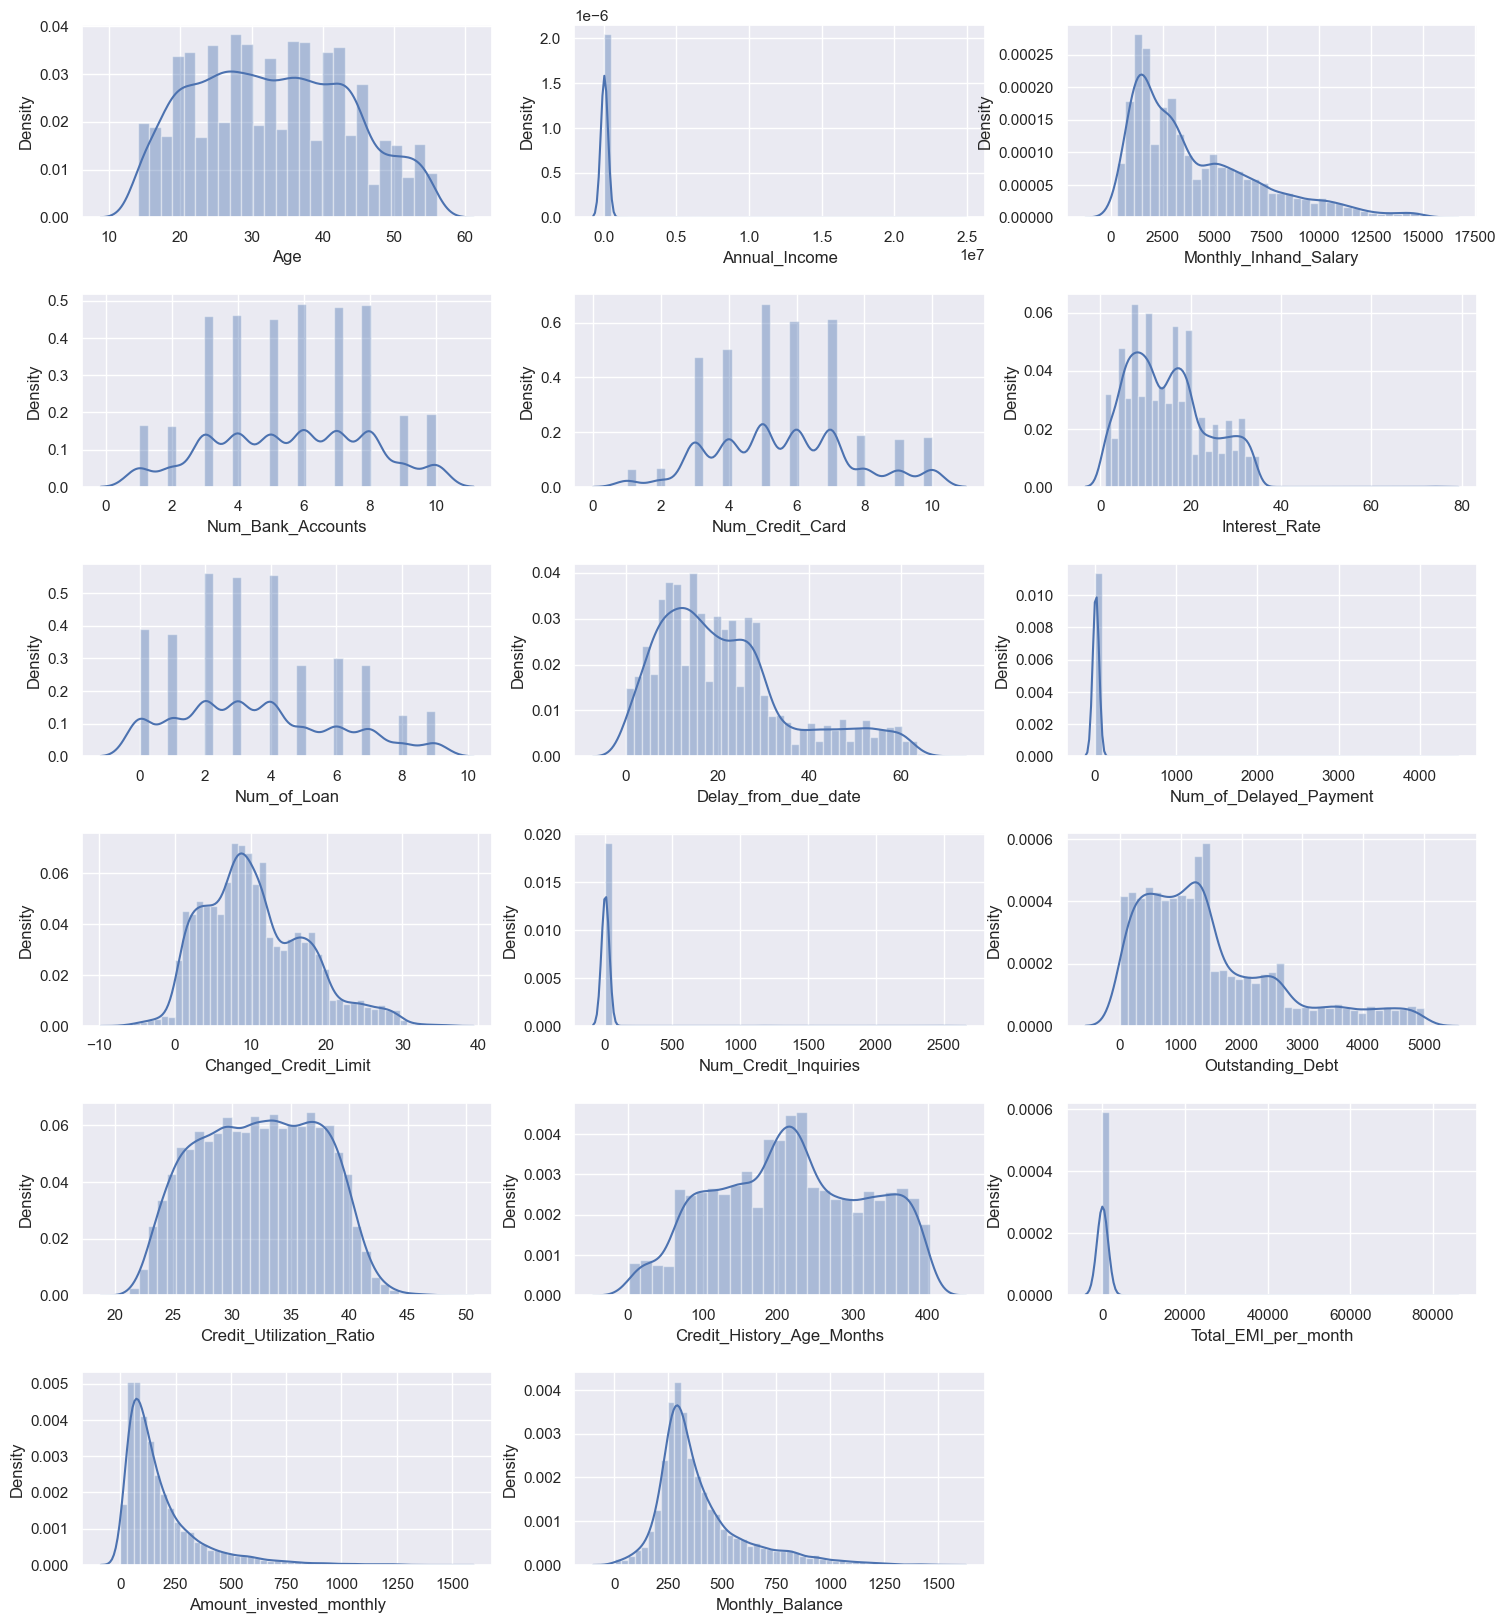

In [14]:
view_distribution(data_out, columns)

In [15]:
skew = data1[columns].skew(axis=0, skipna=True)
print(skew)

Age                          0.16
Annual_Income               12.17
Monthly_Inhand_Salary        1.15
Num_Bank_Accounts           -0.03
Num_Credit_Card              0.23
Interest_Rate                0.54
Num_of_Loan                  0.41
Delay_from_due_date          0.95
Num_of_Delayed_Payment      13.74
Changed_Credit_Limit         0.63
Num_Credit_Inquiries        10.93
Outstanding_Debt             1.18
Credit_Utilization_Ratio    -0.01
Credit_History_Age_Months   -0.02
Total_EMI_per_month          7.03
Amount_invested_monthly      2.34
Monthly_Balance              1.61
dtype: float64


In [16]:
columns_to_avoid = [
    'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
]

In [17]:
cols_2_work_with = [x for x in columns if x not in columns_to_avoid]


In [18]:
def log_transformer(df,columns):
    # for column in columns:
    #     q1 = np.percentile(df[column], 25, interpolation = 'midpoint')
    #     q3 = np.percentile(df[column], 75, interpolation = 'midpoint')
    #     IQR = q3 - q1
    #     upper_key_val = (q3+1.5*IQR)
    #     lower_key_val = (q1-1.5*IQR)
    #     df.loc[(df[column] >= upper_key_val)&(df[column] <= lower_key_val), column] = None
        
    # df.dropna(axis=0)
            
    skew_vals = df[columns].skew(axis=0, skipna=True)
    

    for keys,items in skew_vals.items():
        if items > 1.0:
            df[keys] = np.log(df[keys])
            # df.drop(keys, axis=1, inplace=True)
#     skew = df[].skew(axis=0, skipna=True)
    print(df[columns].skew(axis=0, skipna=True))
    return df.shape


In [19]:
log_transformer(data_out, cols_2_work_with)

Age                          0.16
Annual_Income                1.94
Monthly_Inhand_Salary       -0.14
Num_Bank_Accounts           -0.03
Num_Credit_Card              0.23
Interest_Rate                0.54
Num_of_Loan                  0.41
Delay_from_due_date          0.95
Changed_Credit_Limit         0.63
Outstanding_Debt            -1.40
Credit_Utilization_Ratio    -0.01
Credit_History_Age_Months   -0.02
Total_EMI_per_month           NaN
Amount_invested_monthly       NaN
Monthly_Balance             -0.98
dtype: float64


(8934, 23)

In [20]:
df_new = data_out.replace([np.inf, -np.inf], np.nan)
df_new = df_new.dropna()
print(df_new.shape)
df_new[columns].skew(axis=0, skipna=False)

(7994, 23)


Age                          0.17
Annual_Income                1.98
Monthly_Inhand_Salary       -0.11
Num_Bank_Accounts           -0.08
Num_Credit_Card              0.22
Interest_Rate                0.46
Num_of_Loan                  0.52
Delay_from_due_date          0.88
Num_of_Delayed_Payment      13.75
Changed_Credit_Limit         0.60
Num_Credit_Inquiries        10.92
Outstanding_Debt            -1.42
Credit_Utilization_Ratio    -0.01
Credit_History_Age_Months    0.07
Total_EMI_per_month          2.25
Amount_invested_monthly      0.01
Monthly_Balance             -1.16
dtype: float64

In [21]:
new_cleaned_df = df_new.reset_index(drop=True)
new_cleaned_df.shape

(7994, 23)

In [22]:
q = new_cleaned_df['Annual_Income'].quantile(.985)
dfx_1 = new_cleaned_df[new_cleaned_df['Annual_Income']<q]
print(dfx_1.shape, dfx_1['Annual_Income'].skew(skipna=True, axis=0))

(7874, 23) -0.0593409716066437


In [23]:
q = dfx_1['Num_Credit_Inquiries'].quantile(.986)
dfx_2 = dfx_1[dfx_1['Num_Credit_Inquiries']<q]
print(dfx_2.shape, dfx_2['Num_Credit_Inquiries'].skew(skipna=True, axis=0))

(7751, 23) 0.22551312547349492


In [24]:
q = dfx_2['Num_of_Delayed_Payment'].quantile(.99)
dfx_3 = dfx_2[dfx_2['Num_of_Delayed_Payment']<q]
print(dfx_3.shape, dfx_3['Num_of_Delayed_Payment'].skew(skipna=True, axis=0))

(7668, 23) -0.2937686386864776


In [25]:
q = dfx_3['Total_EMI_per_month'].quantile(.966)
dfx_41 = dfx_3[dfx_3['Total_EMI_per_month']<q]
print(dfx_41.shape, dfx_41['Total_EMI_per_month'].skew(skipna=True, axis=0))

(7407, 23) -0.09986115047846761


In [26]:
q = dfx_41['Monthly_Balance'].quantile(.01)
dfx_5 = dfx_41[dfx_41['Monthly_Balance']>q]
print(dfx_5.shape, dfx_5['Monthly_Balance'].skew(skipna=True, axis=0))

(7332, 23) 0.15141247173220937


In [27]:
q = dfx_5['Outstanding_Debt'].quantile(.015)
dfx_6 = dfx_5[dfx_5['Outstanding_Debt']>q]
print(dfx_6.shape, dfx_6['Outstanding_Debt'].skew(skipna=True, axis=0))

(7222, 23) -0.8334691629169887


In [28]:
q = dfx_6['Interest_Rate'].quantile(.99)
dfx_7 = dfx_6[dfx_6['Interest_Rate']<q]
print(dfx_7.shape, dfx_7['Interest_Rate'].skew(skipna=True, axis=0))

(7086, 23) 0.3359218854951812


In [29]:
df_final = dfx_7.reset_index(drop=True)
df_final.shape

(7086, 23)

In [30]:
df_final[columns].skew(axis=0, skipna=False)

Age                          0.17
Annual_Income               -0.05
Monthly_Inhand_Salary       -0.11
Num_Bank_Accounts           -0.07
Num_Credit_Card              0.22
Interest_Rate                0.34
Num_of_Loan                  0.55
Delay_from_due_date          0.89
Num_of_Delayed_Payment      -0.30
Changed_Credit_Limit         0.60
Num_Credit_Inquiries         0.24
Outstanding_Debt            -0.82
Credit_Utilization_Ratio     0.00
Credit_History_Age_Months    0.08
Total_EMI_per_month         -0.09
Amount_invested_monthly     -0.02
Monthly_Balance              0.16
dtype: float64

In [31]:
df_final.describe(include='all')

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age_Months,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,7086,7086.00,7086,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086,7086.00,7086.00,7086.00,7086,7086.00,7086.00,7086,7086.00,7086
unique,8,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,2,NaN,NaN,6,NaN,3
top,January,NaN,Lawyer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,Yes,NaN,NaN,Low_spent_Small_value_payments,NaN,Standard
freq,2025,NaN,522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3448,NaN,NaN,NaN,4094,NaN,NaN,1931,NaN,3874
mean,NaN,32.70,NaN,10.47,7.98,5.70,5.68,15.29,3.98,22.27,13.95,10.86,5.82,NaN,6.97,32.22,210.44,NaN,4.31,4.81,NaN,5.84,NaN
std,NaN,10.57,NaN,0.78,0.79,2.36,2.06,8.54,2.22,15.02,6.08,6.88,3.75,NaN,0.96,5.05,99.72,NaN,0.92,0.86,NaN,0.44,NaN
min,NaN,14.00,NaN,8.85,5.72,1.00,1.00,1.00,0.00,0.00,0.00,-6.44,0.00,NaN,3.69,21.26,2.00,NaN,1.50,2.34,NaN,4.30,NaN
25%,NaN,24.00,NaN,9.84,7.36,4.00,4.00,8.00,2.00,11.00,10.00,5.77,3.00,NaN,6.45,28.05,131.00,NaN,3.68,4.22,NaN,5.58,NaN
50%,NaN,32.00,NaN,10.47,7.99,6.00,6.00,15.00,4.00,19.00,15.00,9.79,6.00,NaN,7.14,32.20,209.00,NaN,4.30,4.80,NaN,5.78,NaN
75%,NaN,41.00,NaN,11.12,8.62,8.00,7.00,21.00,6.00,29.00,19.00,15.53,9.00,NaN,7.66,36.46,289.75,NaN,5.02,5.40,NaN,6.09,NaN


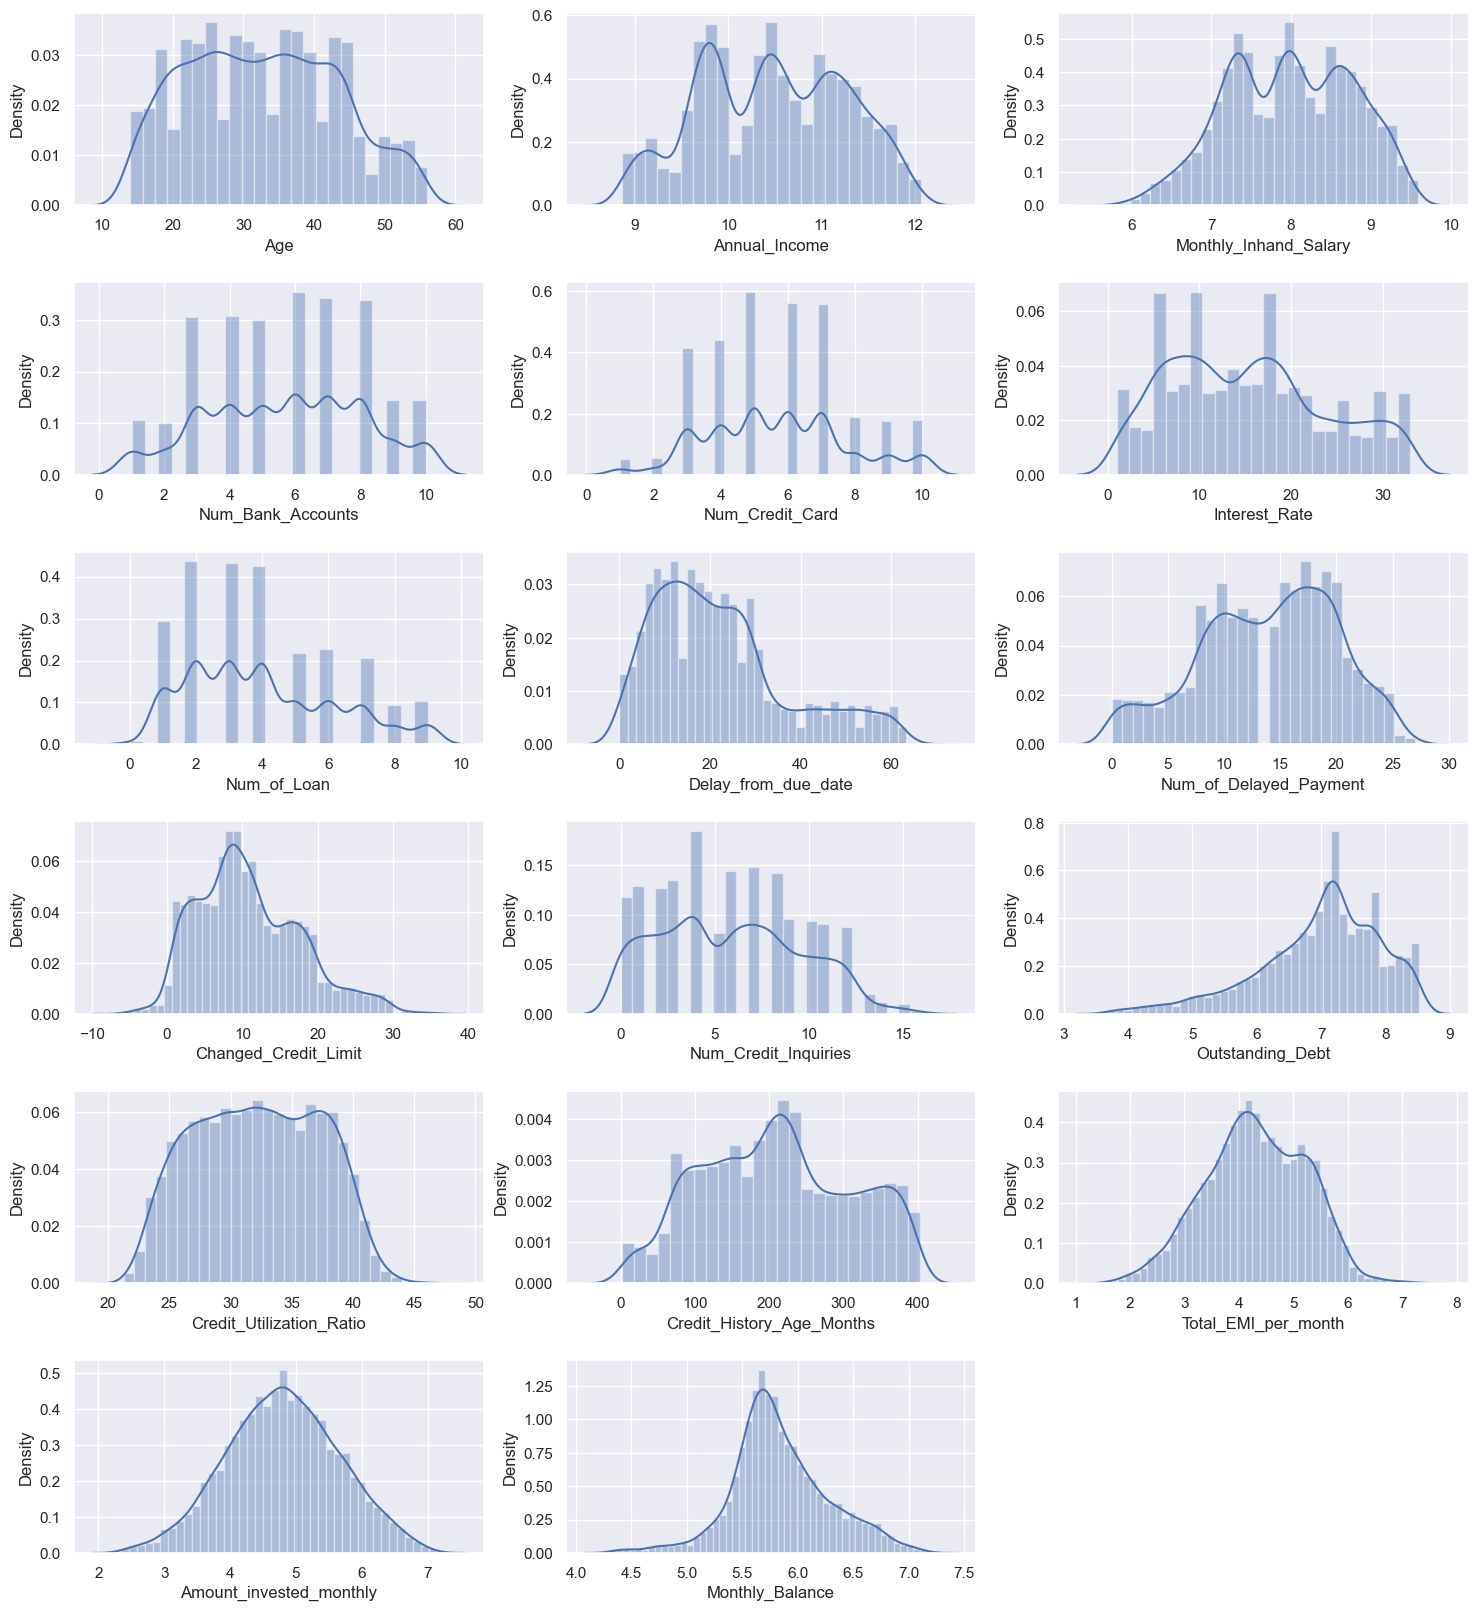

In [32]:
new_cleaned_df_columns = df_final.select_dtypes(exclude='object').columns.to_list()

plt.figure(figsize = (18, 20))
index = 1
for index, column in enumerate(new_cleaned_df_columns):
    plt.subplot(6, 3, index+1)
    sns.distplot(df_final[column])

plt.subplots_adjust(hspace = 0.4)
plt.show()

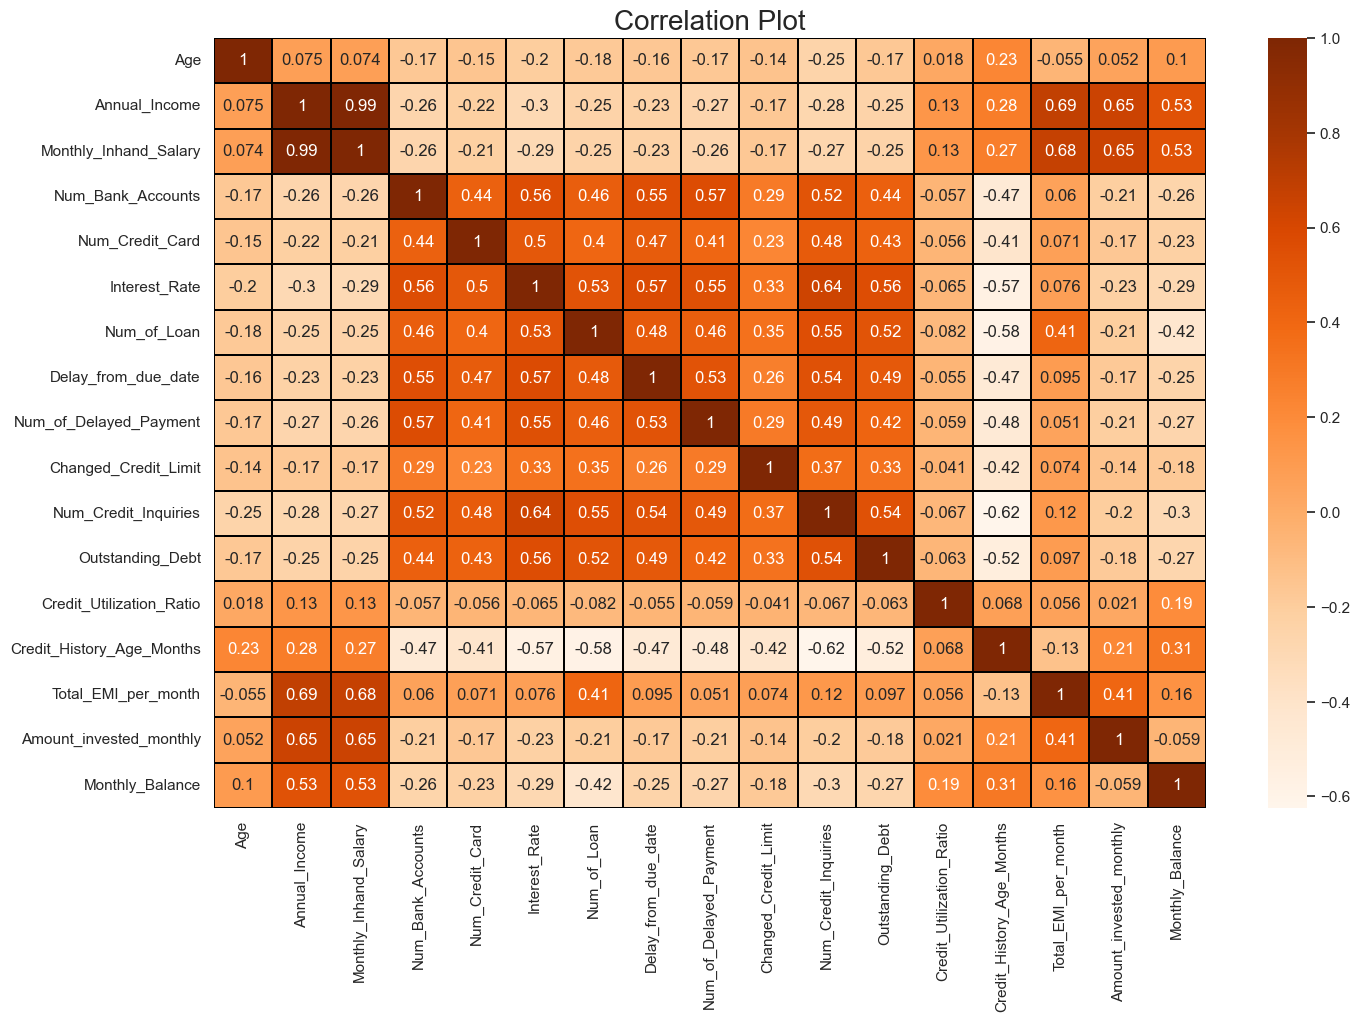

In [33]:
corelation = df_final.corr()
plt.figure(figsize=(16,10))
sns.heatmap(data=corelation, 
            xticklabels=corelation.columns, 
            yticklabels=corelation.columns, 
            annot=True, cmap='Oranges', linecolor='Black', linewidths=0.25
           )
plt.title('Correlation Plot', fontsize=20)
plt.show()

In [34]:
prepared_data = df_final.copy()

In [35]:
np.exp(8.12)

3361.0207450799394

In [36]:
cat_columns = df_final.select_dtypes(include='object')

In [37]:
cat_columns.nunique()

Month                     8
Occupation               15
Credit_Mix                3
Payment_of_Min_Amount     2
Payment_Behaviour         6
Credit_Score              3
dtype: int64

<b>GENERATE DUMMIES<B>

In [38]:
month_dummies = pd.get_dummies(df_final.Month)
df_final.drop('Month', axis=1, inplace=True)

In [39]:
occupation_dummies = pd.get_dummies(df_final.Occupation)
df_final.drop('Occupation', axis=1, inplace=True)

In [40]:
Creative_professionals = occupation_dummies[['Journalist', 'Musician', 'Writer']].max(axis=1)
Business_professionals = occupation_dummies[['Accountant', 'Entrepreneur', 'Manager', 'Media_Manager']].max(axis=1)
Technical_professionals = occupation_dummies[['Architect', 'Engineer', 'Mechanic', 'Scientist']].max(axis=1)
Service_professionals = occupation_dummies[['Doctor', 'Lawyer', 'Teacher']].max(axis=1)

In [41]:
Early_months = month_dummies[['January', 'February']].max(axis=1)
Spring_months = month_dummies[['March', 'April', 'May']].max(axis=1)
Summer_months = month_dummies[['June', 'July', 'August']].max(axis=1)

In [42]:
df_final.select_dtypes(include='object').head()

,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,Good,No,High_spent_Large_value_payments,Good
1,Good,No,Low_spent_Large_value_payments,Standard
2,Good,No,High_spent_Small_value_payments,Standard
3,Good,No,Low_spent_Small_value_payments,Good
4,Standard,Yes,High_spent_Large_value_payments,Standard


In [43]:
credit_dummies = pd.get_dummies(df_final.Credit_Mix, drop_first=True)

In [44]:
credit_dummies.head()

,Good,Standard
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


In [45]:
df_final['Payment_of_Min_Amount'] = df_final['Payment_of_Min_Amount'].map({'No':0, 'Yes':1})
df_final.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age_Months,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,28,10.46,8.02,2,4,6,1,7,1,7.42,2,Good,6.41,38.55,320,0,2.93,3.70,High_spent_Large_value_payments,6.18,Good
1,54,10.33,7.87,2,5,4,1,0,6,1.99,4,Good,6.45,26.54,207,0,2.80,4.40,Low_spent_Large_value_payments,6.07,Standard
2,23,11.65,9.19,2,5,7,3,11,11,11.24,8,Good,7.23,29.82,260,0,5.42,6.48,High_spent_Small_value_payments,5.91,Standard
3,44,10.35,7.95,1,6,12,2,2,0,-1.24,2,Good,6.04,28.22,318,0,3.84,5.70,Low_spent_Small_value_payments,5.43,Good
4,40,10.43,7.99,5,5,20,3,16,20,11.00,4,Standard,7.19,30.91,231,1,4.17,4.25,High_spent_Large_value_payments,5.99,Standard


In [46]:
credit_mix_dummies = pd.get_dummies(df_final['Credit_Mix'], drop_first=True)
payment_behavior_dummies = pd.get_dummies(df_final['Payment_Behaviour'], drop_first=True)
payment_behavior_dummies.head()

,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments
0,0,0,0,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,0,0,0,1
4,0,0,0,0,0


In [47]:
payment_behavior_dummies.head()

,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments
0,0,0,0,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,0,0,0,1
4,0,0,0,0,0


In [48]:
Small_value_payments = payment_behavior_dummies[['Low_spent_Small_value_payments', 'High_spent_Small_value_payments']].max(axis=1)
Medium_value_payments = payment_behavior_dummies[['Low_spent_Medium_value_payments', 'High_spent_Medium_value_payments']].max(axis=1)
Large_value_payments = payment_behavior_dummies[['Low_spent_Large_value_payments']].max(axis=1)
df_final.drop('Payment_Behaviour', axis=1, inplace=True)

In [49]:
df_final.drop('Credit_Mix', axis=1, inplace=True)

In [50]:
df_final.shape

(7086, 19)

In [51]:
transformed_df = pd.concat([
    df_final, Creative_professionals, Business_professionals, Technical_professionals, Service_professionals, 
    Early_months, Spring_months, Summer_months, credit_dummies, Small_value_payments, Medium_value_payments,
    Large_value_payments], axis=1).reset_index(drop=True)

In [52]:
transformed_df.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age_Months,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,0,1,2,3,4,5,6,Good,Standard,7,8,9
0,28,10.46,8.02,2,4,6,1,7,1,7.42,2,6.41,38.55,320,0,2.93,3.70,6.18,Good,0,0,0,1,1,0,0,1,0,0,0,0
1,54,10.33,7.87,2,5,4,1,0,6,1.99,4,6.45,26.54,207,0,2.80,4.40,6.07,Standard,0,1,0,0,1,0,0,1,0,0,0,1
2,23,11.65,9.19,2,5,7,3,11,11,11.24,8,7.23,29.82,260,0,5.42,6.48,5.91,Standard,0,0,0,1,0,1,0,1,0,1,0,0
3,44,10.35,7.95,1,6,12,2,2,0,-1.24,2,6.04,28.22,318,0,3.84,5.70,5.43,Good,1,0,0,0,1,0,0,1,0,1,0,0
4,40,10.43,7.99,5,5,20,3,16,20,11.00,4,7.19,30.91,231,1,4.17,4.25,5.99,Standard,0,0,0,1,1,0,0,0,1,0,0,0


In [53]:
transformed_df.columns.values

array(['Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
       'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age_Months',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score', 0, 1,
       2, 3, 4, 5, 6, 'Good', 'Standard', 7, 8, 9], dtype=object)

In [54]:
new_columns =   ['Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
       'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries',
       'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age_Months', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Credit_Score', 'Creative_professionals', 'Business_professionals', 
       'Technical_professionals', 'Service_professionals', 'Early_months', 
       'Spring_months', 'Summer_months', 'Good_credit_mix', 'Standard_credit_mix',
        'Small_value_payments', 'Medium_value_payments', 'Large_value_payments']

transformed_df.columns = new_columns

In [55]:
transformed_df.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age_Months', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_Score', 'Creative_professionals', 'Business_professionals',
       'Technical_professionals', 'Service_professionals', 'Early_months',
       'Spring_months', 'Summer_months', 'Good_credit_mix',
       'Standard_credit_mix', 'Small_value_payments', 'Medium_value_payments',
       'Large_value_payments'],
      dtype='object')

In [56]:
rearranged_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age_Months',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 
       'Creative_professionals', 'Business_professionals',
       'Technical_professionals', 'Service_professionals', 'Early_months',
       'Spring_months', 'Summer_months', 'Good_credit_mix',
       'Standard_credit_mix', 'Small_value_payments', 'Medium_value_payments',
       'Large_value_payments', 'Credit_Score']
final_clean_df = transformed_df[rearranged_columns]
final_clean_df.describe(include='all')

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age_Months,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Creative_professionals,Business_professionals,Technical_professionals,Service_professionals,Early_months,Spring_months,Summer_months,Good_credit_mix,Standard_credit_mix,Small_value_payments,Medium_value_payments,Large_value_payments,Credit_Score
count,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3874
mean,32.70,10.47,7.98,5.70,5.68,15.29,3.98,22.27,13.95,10.86,5.82,6.97,32.22,210.44,0.58,4.31,4.81,5.84,0.19,0.26,0.27,0.21,0.50,0.35,0.15,0.24,0.49,0.40,0.35,0.11,NaN
std,10.57,0.78,0.79,2.36,2.06,8.54,2.22,15.02,6.08,6.88,3.75,0.96,5.05,99.72,0.49,0.92,0.86,0.44,0.40,0.44,0.44,0.41,0.50,0.48,0.36,0.43,0.50,0.49,0.48,0.32,NaN
min,14.00,8.85,5.72,1.00,1.00,1.00,0.00,0.00,0.00,-6.44,0.00,3.69,21.26,2.00,0.00,1.50,2.34,4.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
25%,24.00,9.84,7.36,4.00,4.00,8.00,2.00,11.00,10.00,5.77,3.00,6.45,28.05,131.00,0.00,3.68,4.22,5.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
50%,32.00,10.47,7.99,6.00,6.00,15.00,4.00,19.00,15.00,9.79,6.00,7.14,32.20,209.00,1.00,4.30,4.80,5.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
75%,41.00,11.12,8.62,8.00,7.00,21.00,6.00,29.00,19.00,15.53,9.00,7.66,36.46,289.75,1.00,5.02,5.40,6.09,0.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,NaN


In [57]:
X, y = final_clean_df.drop('Credit_Score', axis=1), final_clean_df['Credit_Score']
le = LabelEncoder()
le.fit(y)
targets = le.transform(y)
X_train, X_test, y_train, y_test = train_test_split(X.values, targets, shuffle=True, random_state=17, stratify=targets)

<b>BALANCING THE DATASET<b>

In [58]:
sm = SMOTE(sampling_strategy='not majority', random_state=17)
resampled_X_train, resampled_y_train = sm.fit_resample(X_train, y_train)

In [59]:
resampled_X_train.shape, y_train.

(8715, 30)

Standardize the data

In [61]:
scalar = StandardScaler()
scalar.fit(resampled_X_train)
transformed_X_train = scalar.transform(resampled_X_train)
transformed_X_test = scalar.transform(X_test)

<b>MODEL BUILDING<b>

In [63]:
model_params = {
    'xgboost' : {
        'model' : xgb.XGBClassifier(objective='multi:softprob', random_state=17),
        'params' : {
            'learning_rate' : [x for x in np.arange(0.01, 0.3, 0.02)],
            'n_estimators' : [x for x in range(100, 1200, 100)],
            'max_depth' : [int(x) for x in np.linspace(10, 90, 5)],
            'colsample_bytree' : [x for x in np.arange(0.1, 0.6, 0.1)],
            'subsample' : [x for x in np.arange(0.5, 1, 0.1)]

        }
    },

    'RandomForest' : {
        'model' : RandomForestClassifier(random_state=17),
        'params' : {
            'criterion' : ['gini', 'entropy'],
            'n_estimators' : [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
            'max_features' : ['auto', 'sqrt'],
            'max_depth' : [int(x) for x in np.linspace(10, 90, 5)],
            'min_samples_split' : [x for x in range(2, 10, 1)],
            'min_samples_leaf' : [x for x in range(2, 5, 1)],
            'bootstrap' : [True, False]
        }
    },

    'DecisionTree' : {
        'model' : DecisionTreeClassifier(random_state=17),
        'params' : {
            'criterion' : ['gini', 'entropy'],
            'splitter' : ['best', 'random'],
            'max_features' : ['auto', 'sqrt'],
            'max_depth' : [int(x) for x in np.linspace(10, 90, 5)],
            'min_samples_split' : [x for x in range(2, 10, 1)],
            'min_samples_leaf' : [x for x in range(2, 5, 1)],
        }    
    }
}

In [67]:
def best_model_params(x, y, model_params):
    '''helps select the best parameters for the hyper-parameters to use in training the data'''
    scores = []
    model_name = []
    model_scores = pd.DataFrame()
    for model, mps in model_params.items():
        cross_val = RandomizedSearchCV(mps['model'], mps['params'], cv=10, n_iter=3, n_jobs=-1)
        cross_val.fit(x, y)
        model_name.append(model)
        scores.append(cross_val.best_score_)

    model_scores['Model'] = model_name
    model_scores['Scores'] = scores
    

    return model_scores

In [68]:
best_model_params(transformed_X_train, resampled_y_train, model_params)

,Model,Scores
0,xgboost,0.83
1,RandomForest,0.83
2,DecisionTree,0.75


In [70]:
xg = xgb.XGBClassifier(objective='multi:softprob')
xg.fit(transformed_X_train, resampled_y_train)
xg.score(transformed_X_train, resampled_y_train)

0.995754446356856

In [71]:
xgboost_alg = xgb.XGBClassifier(objective='multi:softprob', random_state=17),
params1 = {
    'learning_rate' : [x for x in np.arange(0.01, 0.3, 0.02)],
    'n_estimators' : [x for x in range(100, 1200, 100)],
    'max_depth' : [int(x) for x in np.linspace(10, 90, 5)],
    'colsample_bytree' : [x for x in np.arange(0.1, 0.6, 0.1)],
    'subsample' : [x for x in np.arange(0.5, 1, 0.1)]

}

In [72]:
cross_val = RandomizedSearchCV(xgboost_alg, params1, cv=10, n_iter=5, n_jobs=-1)
cross_val.fit(transformed_X_train, resampled_y_train)

TypeError: estimator should be an estimator implementing 'fit' method, XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...) was passed